<a href="https://colab.research.google.com/github/rcoroneldev/Machine-Learning-Sanitas-DS/blob/main/Machine_Learning_Sanitas_DS1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Customer Churn Prediction in Sanitas Case
 ### Pasos para resolver el problema

1. Definir el problema a resolver.
2. Obtener los datos. 
3. Analisis exploratorio de datos (EDA)
3. Preparar y limpiar los datos (Data preparation).
3. Visualizacion de los datos.
4. Modelado.  
5. Evaluacion de Modelo.
6. Despliegue.
7. Conclusion.




# Instalacion y importacion de librerias

In [ ]:
# Arrays / Lineal Algebra
import numpy as np

# Dataframes
import pandas as pd

# librries of visualization
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('classic')
import seaborn as sns
sns.set()
import plotly
import plotly.express as px

# Para montar drive
from google.colab import drive

# machine learning libraries
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.impute import SimpleImputer



In [ ]:
plotly.__version__

'5.5.0'

In [ ]:
# Libreria de pandas profiling
!pip install pandas-profiling

In [ ]:
!pip install pandas-profiling==2.8.0

In [ ]:
# visualizacion de excell
!pip install openpyxl==3.0.9

# 1. Definicion de problema a resolver

# 

# 2. Obtener de los datos

## Load dataset

In [ ]:
# Montamos drive
# drive.mount('/content/drive', force_remount=True) # Montamos nuestra unidad de Google Drive

In [ ]:
# Lectura de los datos
df_credit = pd.read_excel('./Dataset_Caso_SANITASF.xlsx')

# Lectura mediante Google drive
#path = '/content/drive/MyDrive/Master en Data Science/Machine Learning/Proyecto Final/Data/Dataset_Caso_SANITASF.xlsx'
#df_credit = pd.read_excel(path)


# 3. Analisis exploratorio de datos (EDA)

In [ ]:
# visualizacion de las 10 primeras filas
df_credit.head(10)

,ID,INGRESO_201710,INGRESO_201711,INGRESO_201712,INGRESO_201801,INGRESO_201802,INGRESO_201803,INGRESO_201804,INGRESO_201805,INGRESO_201806,INGRESO_201807,INGRESO_201808,INGRESO_201809,INGRESO_201810,INGRESO_201811,INGRESO_201812,INGRESO_201901,INGRESO_201902,INGRESO_201903,INGRESO_201904,INGRESO_201905,INGRESO_201906,INGRESO_201907,INGRESO_201908,INGRESO_201909,INGRESO_201910,INGRESO_201911,INGRESO_201912,INGRESO_202001,CODMES_ALTA,EDAD,Attrition_Sistema_201601,Attrition_Sistema_201602,Attrition_Sistema_201603,Attrition_Sistema_201604,Attrition_Sistema_201605,Attrition_Sistema_201606,Attrition_Sistema_201607,Attrition_Sistema_201608,Attrition_Sistema_201609,...,DIAS_MORA_201804,DIAS_MORA_201805,DIAS_MORA_201806,DIAS_MORA_201807,DIAS_MORA_201808,DIAS_MORA_201809,DIAS_MORA_201810,DIAS_MORA_201811,DIAS_MORA_201812,DIAS_MORA_201901,DIAS_MORA_201902,DIAS_MORA_201903,DIAS_MORA_201904,DIAS_MORA_201905,DIAS_MORA_201906,DIAS_MORA_201907,DIAS_MORA_201908,DIAS_MORA_201909,DIAS_MORA_201910,DIAS_MORA_201911,DIAS_MORA_201912,DIAS_MORA_202001,SEGMENTO,FREC_PAGO,EDAD_AFIL_MESES,SEXO,CATEGORIA,EDAD_AFIL,FLG_FUMADOR,RANGO_INGRESO_APOR,DEPARTAMENTO,PROVINCIA,DISTRITO,MACRO_REGION,TIPO_PAGO,vp_primas,vp_siniestros,vp_tecnico,vp_gastos,VP_OPERATIVO
0,1,849.00,849.00,849.00,849.00,849.00,849.00,849.00,849.00,849.00,1097.00,1097.00,1097.00,1097.00,1097.00,1097.00,1097.00,1097.000000,1097.000000,1097.000000,1097.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,548.000000,548.000000,201801.0,53.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,...,NaN,7.0,0.0,7.0,0.0,0.0,7.0,37.0,68.0,99.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,05.LIMITADO,01.MENSUAL,635,M,TITULAR,52,FUMA,02.[600 - 1000>,UCAYALI,CORONEL,CALLERIA,SELVA,DEBITO,2754.6892,1660.5546,1066.2301,521.49500,544.73511
1,2,857.00,857.00,857.00,857.00,857.00,857.00,857.00,857.00,857.00,857.00,857.00,857.00,857.00,857.00,857.00,857.00,857.000000,857.000000,857.000000,857.000000,857.000000,857.000000,857.000000,857.000000,857.000000,857.000000,857.000000,857.000000,200509.0,80.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,08.NBC_SI,02.ANUAL,784,M,TITULAR,65,NO FUMA,02.[600 - 1000>,UCAYALI,CORONEL,CALLERIA,SELVA,EFECTIVO,20851.5960,13848.7160,6791.6572,2850.57350,3941.08400
2,3,4319.05,4319.05,4276.78,4140.73,4140.73,4140.73,4140.73,3278.82,3278.82,3278.82,3278.82,3278.82,3278.82,2379.55,2379.55,2379.55,2379.553081,2379.553081,2379.553081,2379.553081,2379.553081,2379.553081,2379.553081,2379.553081,2379.553081,4750.258900,4750.258900,4906.339466,201608.0,59.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,03.POTENCIAL,01.MENSUAL,664,F,TITULAR,55,NO FUMA,04.[2000 - 4000>,UCAYALI,CORONEL,CALLERIA,SELVA,CREDITO,6860.8706,4427.8164,2363.5544,2520.37260,-156.81792
3,4,4000.00,4000.00,4000.00,4000.00,4000.00,4000.00,4000.00,4000.00,4000.00,4000.00,4000.00,4000.00,4000.00,4000.00,4000.00,4000.00,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,201401.0,55.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,10.0,41.0,69.0,100.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,04.REGULAR,01.MENSUAL,620,F,TITULAR,51,NO FUMA,05.[4000 - 8000>,UCAYALI,CORONEL,CALLERIA,SELVA,DEBITO,9865.3154,5627.2607,4138.1206,1438.12510,2699.99560
4,5,4000.00,4000.00,4000.00,4000.00,4000.00,4000.00,4000.00,4000.00,4000.00,4000.00,4000.00,4000.00,4000.00,4000.00,4000.00,4000.00,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,201912.0,56.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,...,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,10.0,41.0,69.0,100.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,04.REGULAR,01.MENSUAL,620,F,TITULAR,51,NO FUMA,05.[4000 - 8000>,UCAYALI,CORONEL,

In [ ]:
# visualizacion de las 10 ultimas columnas
df_credit.tail(10)

,ID,INGRESO_201710,INGRESO_201711,INGRESO_201712,INGRESO_201801,INGRESO_201802,INGRESO_201803,INGRESO_201804,INGRESO_201805,INGRESO_201806,INGRESO_201807,INGRESO_201808,INGRESO_201809,INGRESO_201810,INGRESO_201811,INGRESO_201812,INGRESO_201901,INGRESO_201902,INGRESO_201903,INGRESO_201904,INGRESO_201905,INGRESO_201906,INGRESO_201907,INGRESO_201908,INGRESO_201909,INGRESO_201910,INGRESO_201911,INGRESO_201912,INGRESO_202001,CODMES_ALTA,EDAD,Attrition_Sistema_201601,Attrition_Sistema_201602,Attrition_Sistema_201603,Attrition_Sistema_201604,Attrition_Sistema_201605,Attrition_Sistema_201606,Attrition_Sistema_201607,Attrition_Sistema_201608,Attrition_Sistema_201609,...,DIAS_MORA_201804,DIAS_MORA_201805,DIAS_MORA_201806,DIAS_MORA_201807,DIAS_MORA_201808,DIAS_MORA_201809,DIAS_MORA_201810,DIAS_MORA_201811,DIAS_MORA_201812,DIAS_MORA_201901,DIAS_MORA_201902,DIAS_MORA_201903,DIAS_MORA_201904,DIAS_MORA_201905,DIAS_MORA_201906,DIAS_MORA_201907,DIAS_MORA_201908,DIAS_MORA_201909,DIAS_MORA_201910,DIAS_MORA_201911,DIAS_MORA_201912,DIAS_MORA_202001,SEGMENTO,FREC_PAGO,EDAD_AFIL_MESES,SEXO,CATEGORIA,EDAD_AFIL,FLG_FUMADOR,RANGO_INGRESO_APOR,DEPARTAMENTO,PROVINCIA,DISTRITO,MACRO_REGION,TIPO_PAGO,vp_primas,vp_siniestros,vp_tecnico,vp_gastos,VP_OPERATIVO
20292,20293,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,201408.0,5.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,08.NBC_SI,02.ANUAL,6,M,TITULAR,0,NO FUMA,NaN,LIMA,LIMA,LINCE,LIMA_MODERNA,EFECTIVO,1742.64920,177.007190,1547.98930,537.98462,1010.00460
20293,20294,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,201008.0,63.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,28.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,08.NBC_SI,02.ANUAL,718,M,TITULAR,59,NO FUMA,NaN,LIMA,LIMA,SAN ISIDRO,LIMA_MODERNA,EFECTIVO,5783.93950,3599.402100,2125.94730,909.26923,1216.67800
20294,20295,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,201803.0,17.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,01.ELITE,02.ANUAL,176,M,OTROS,14,NO FUMA,06.8000 A MÁS,LIMA,LIMA,MIRAFLORES,LIMA_MODERNA,CREDITO,1577.31260,272.869600,1288.46520,461.20718,827.25800
20295,20296,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,201904.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,08.NBC_SI,01.MENSUAL,71,F,HIJO (A),5,NO FUMA,NaN,LIMA,LIMA,SAN MARTIN DE PORRES,LIMA_NORTE,CREDITO,864.22815,92.435837,763.03778,219.53957,543.49823
20296,20297,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,201711.0,7.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,08.NBC_SI,01.MENSUAL,71,F,HIJO (A),5,NO FUMA,NaN,LIMA,LIMA,SAN MARTIN DE PORRES,LIMA_NORTE,CREDITO,864.22815,92.435837,763.03778,219.53957,543.49823
20297,20298,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,201709.0,3.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,08.NBC_SI,02.ANUAL,19,F,TITULAR,1,NO FUMA,NaN,PASCO,OXAPAMPA,OXAPAMPA,SIERRA_CENTR,EFECTIVO,544.32782,60.926010,477.88785,180.59570,297.29214
20298,20299,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,201704.0,24.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,...,0.0,0.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,01.ELITE,01.MENSUAL

In [ ]:
# filas y columnas del conjunto de datos
df_credit.shape

(20302, 400)

In [ ]:
# tipos de datos de las variables 
df_credit.dtypes

ID                  int64
INGRESO_201710    float64
INGRESO_201711    float64
INGRESO_201712    float64
INGRESO_201801    float64
                   ...   
vp_primas         float64
vp_siniestros     float64
vp_tecnico        float64
vp_gastos         float64
VP_OPERATIVO      float64
Length: 400, dtype: object

In [ ]:
# Informacion del conjunto de datos
df_credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20302 entries, 0 to 20301
Columns: 400 entries, ID to VP_OPERATIVO
dtypes: float64(386), int64(3), object(11)
memory usage: 62.0+ MB


In [ ]:
df_credit.columns

Index(['ID', 'INGRESO_201710', 'INGRESO_201711', 'INGRESO_201712',
       'INGRESO_201801', 'INGRESO_201802', 'INGRESO_201803', 'INGRESO_201804',
       'INGRESO_201805', 'INGRESO_201806',
       ...
       'DEPARTAMENTO', 'PROVINCIA', 'DISTRITO', 'MACRO_REGION', 'TIPO_PAGO',
       'vp_primas', 'vp_siniestros', 'vp_tecnico', 'vp_gastos',
       'VP_OPERATIVO'],
      dtype='object', length=400)

In [ ]:
# valores unicos en cada columna
df_credit.nunique()

ID                20302
INGRESO_201710     5164
INGRESO_201711     5163
INGRESO_201712     5353
INGRESO_201801     5350
                  ...  
vp_primas         19845
vp_siniestros     19848
vp_tecnico        19846
vp_gastos         19839
VP_OPERATIVO      19847
Length: 400, dtype: int64

In [ ]:
# Analisis descriptivo de las variables de tipo object
df_credit.describe(include=['object'])

,SEGMENTO,FREC_PAGO,SEXO,CATEGORIA,FLG_FUMADOR,RANGO_INGRESO_APOR,DEPARTAMENTO,PROVINCIA,DISTRITO,MACRO_REGION,TIPO_PAGO
count,20302,20302,20302,20302,20302,18455,20296,20296,20296,20302,20294
unique,8,2,2,5,2,6,25,150,459,14,3
top,03.POTENCIAL,01.MENSUAL,F,TITULAR,NO FUMA,04.[2000 - 4000>,LIMA,LIMA,SANTIAGO DE SURCO,LIMA_MODERNA,CREDITO
freq,5736,16359,11432,13132,17678,5652,13385,13106,2029,7601,10667


In [ ]:
# Anaalisis descriptivo de todas las variables 'all'
df_credit.describe(include = 'all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
ID,20302.0,NaN,NaN,NaN,10151.5,5860.826918,1.0,5076.25,10151.5,15226.75,20302.0
INGRESO_201710,13392.0,NaN,NaN,NaN,3125.597298,4232.464202,0.0,886.75,1960.6,3740.6,91379.0
INGRESO_201711,13392.0,NaN,NaN,NaN,3123.593644,4233.597092,0.0,880.0,1959.12,3740.6,91379.0
INGRESO_201712,13392.0,NaN,NaN,NaN,3175.222958,4221.357378,0.0,926.46,2044.15,3804.25,91379.0
INGRESO_201801,13392.0,NaN,NaN,NaN,3183.458605,4218.244813,0.0,935.0,2057.785,3847.1775,91379.0
...,...,...,...,...,...,...,...,...,...,...,...
vp_primas,20302.0,NaN,NaN,NaN,5303.961142,6007.830684,225.83705,1479.052175,2823.6958,6598.30605,42315.637
vp_siniestros,20302.0,NaN,NaN,NaN,3351.555631,7621.410118,25.755638,281.40516,1022.2345,3202.598425,125411.56
vp_tecnico,20302.0,NaN,NaN,NaN,1898.493746,5583.33337,-116059.05,985.592193,1589.22595,3289.25485,28740.23
vp_gastos,20302.0,NaN,NaN,NaN,1003.889276,896.217913,56.057346,416.74829,684.250885,1258.00465,11069.376


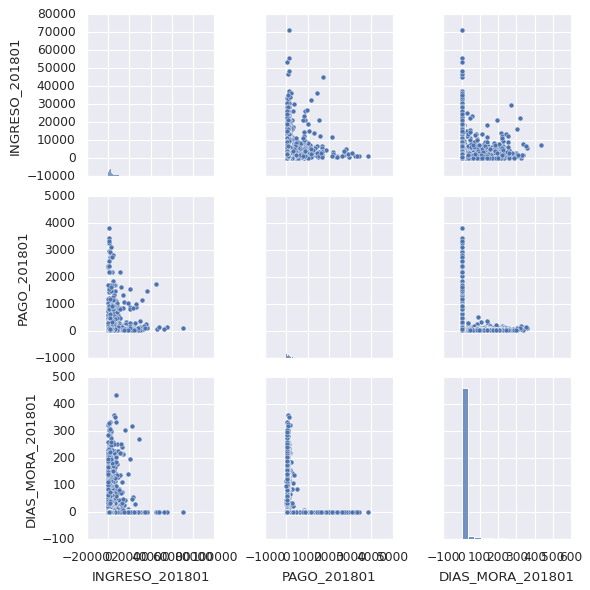

In [ ]:
sns.pairplot(
    df_credit,
    #PORCENTAJE_BAJAS_GF_201801
    x_vars=["INGRESO_201801", "PAGO_201801", "DIAS_MORA_201801"],
    y_vars=["INGRESO_201801", "PAGO_201801", "DIAS_MORA_201801"],
    #TIPO_PAGO
)

## Visualizacion con Pandas Profiling

In [ ]:
#reporte = ProfileReport(df_credit,title="Reporte",explorative=True)
#reporte.to_notebook_iframe()

## Visualizacion con Sweetviz

In [ ]:
dimensions_correlation=["INGRESO_201801", "PAGO_201801", "DIAS_MORA_201801"]
fig = px.scatter_matrix(df_credit,dimensions=dimensions_correlation)
fig.show()

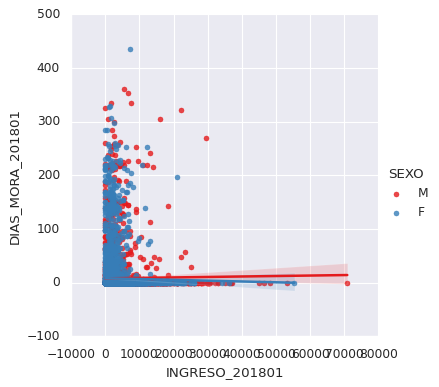

In [ ]:
g = sns.lmplot(x="INGRESO_201801", y="DIAS_MORA_201801", hue="SEXO", data=df_credit,palette="Set1")

## Analisis de variables 

### Analisis univariado

In [ ]:
fig_hist_age = px.histogram(df_credit,x ='EDAD_AFIL',title="")
fig_hist_age.show()


In [ ]:
fig_hist_segmento = px.histogram(df_credit,x ='SEGMENTO',title="")
fig_hist_segmento.show()


### Analisis Bivariado

#### Graficos de dispersion

![alt text](https://datapeaker.com/wp-content/uploads/2021/08/image4-1-4052764.png)

In [ ]:
# grafico de dispersion entre pago y dias de mora
fig = px.scatter(df_credit, x="PAGO_201801", y="DIAS_MORA_201801", color="SEGMENTO")
fig.show()

In [ ]:
# grafico de dispersion  entre dias de mora con la edad del afiliado
fig = px.scatter(df_credit, x="DIAS_MORA_202001", y="EDAD_AFIL",color ='CATEGORIA')
fig.show()

### Coeficiente de correlacion de Pearson

In [ ]:
df_credit.corr(method="pearson")

,ID,INGRESO_201710,INGRESO_201711,INGRESO_201712,INGRESO_201801,INGRESO_201802,INGRESO_201803,INGRESO_201804,INGRESO_201805,INGRESO_201806,INGRESO_201807,INGRESO_201808,INGRESO_201809,INGRESO_201810,INGRESO_201811,INGRESO_201812,INGRESO_201901,INGRESO_201902,INGRESO_201903,INGRESO_201904,INGRESO_201905,INGRESO_201906,INGRESO_201907,INGRESO_201908,INGRESO_201909,INGRESO_201910,INGRESO_201911,INGRESO_201912,INGRESO_202001,CODMES_ALTA,EDAD,Attrition_Sistema_201601,Attrition_Sistema_201602,Attrition_Sistema_201603,Attrition_Sistema_201604,Attrition_Sistema_201605,Attrition_Sistema_201606,Attrition_Sistema_201607,Attrition_Sistema_201608,Attrition_Sistema_201609,...,DIAS_MORA_201705,DIAS_MORA_201706,DIAS_MORA_201707,DIAS_MORA_201708,DIAS_MORA_201709,DIAS_MORA_201710,DIAS_MORA_201711,DIAS_MORA_201712,DIAS_MORA_201801,DIAS_MORA_201802,DIAS_MORA_201803,DIAS_MORA_201804,DIAS_MORA_201805,DIAS_MORA_201806,DIAS_MORA_201807,DIAS_MORA_201808,DIAS_MORA_201809,DIAS_MORA_201810,DIAS_MORA_201811,DIAS_MORA_201812,DIAS_MORA_201901,DIAS_MORA_201902,DIAS_MORA_201903,DIAS_MORA_201904,DIAS_MORA_201905,DIAS_MORA_201906,DIAS_MORA_201907,DIAS_MORA_201908,DIAS_MORA_201909,DIAS_MORA_201910,DIAS_MORA_201911,DIAS_MORA_201912,DIAS_MORA_202001,EDAD_AFIL_MESES,EDAD_AFIL,vp_primas,vp_siniestros,vp_tecnico,vp_gastos,VP_OPERATIVO
ID,1.000000,-0.209304,-0.209128,-0.205281,-0.205378,-0.205378,-0.103519,-0.202023,-0.125341,-0.125341,-0.144679,-0.144679,-0.144034,-0.150949,-0.150865,-0.150865,-0.150045,-0.155223,-0.155223,-0.153597,-0.152787,-0.148674,-0.147864,-0.146841,-0.145824,-0.145017,-0.145131,-0.140789,-0.140068,0.341128,-0.884233,0.260670,0.256716,0.248816,0.245150,0.241817,0.239302,0.237011,0.234617,0.229283,...,0.033495,0.038499,0.031178,0.030479,0.045098,0.043872,0.040499,0.031557,0.035724,0.033321,0.036058,0.026330,0.023506,0.037134,0.059404,0.075548,0.071618,0.080715,0.091628,0.091469,0.101844,0.102724,0.101779,0.103238,0.103437,0.096045,0.078784,0.069890,0.071037,0.081832,0.079655,0.083427,0.089567,-0.876663,-0.876673,-0.614297,-0.411084,-0.093167,-0.607384,0.004276
INGRESO_201710,-0.209304,1.000000,0.999918,0.996848,0.996264,0.996264,0.578967,0.994589,0.651270,0.651270,0.790390,0.790390,0.790000,0.783793,0.789848,0.789848,0.789367,0.850555,0.850555,0.850024,0.844216,0.825674,0.825284,0.824792,0.824020,0.823576,0.822190,0.737572,0.737179,-0.155887,0.124976,-0.119442,-0.118361,-0.120098,-0.120874,-0.120261,-0.118538,-0.118034,-0.115737,-0.115117,...,-0.009316,-0.006464,-0.000963,0.002904,0.003004,0.008363,-0.006206,-0.006733,0.000545,0.006469,-0.000427,-0.002636,-0.012504,-0.025447,-0.033866,-0.039617,-0.049856,-0.053735,-0.066252,-0.079802,-0.093181,-0.087749,-0.091995,-0.087466,-0.089545,-0.078937,-0.074166,-0.072286,-0.071291,-0.073339,-0.069424,-0.069620,-0.072082,0.101303,0.101732,0.175550,0.085551,0.058775,0.170968,0.033618
INGRESO_201711,-0.209128,0.999918,1.000000,0.996937,0.996348,0.996348,0.578962,0.994670,0.651274,0.651274,0.790402,0.790402,0.790012,0.783786,0.789841,0.789841,0.789360,0.850533,0.850533,0.850002,0.844197,0.825659,0.825269,0.824777,0.824006,0.823562,0.822173,0.737586,0.737190,-0.156027,0.124804,-0.119393,-0.118318,-0.120058,-0.120843,-0.120239,-0.118488,-0.117995,-0.115708,-0.115099,...,-0.009355,-0.006564,-0.000960,0.002794,0.002765,0.008380,-0.006308,-0.006604,0.000674,0.006563,-0.000365,-0.002515,-0.012426,-0.025406,-0.033994,-0.039658,-0.049823,-0.053758,-0.066269,-0.079798,-0.093231,-0.087849,-0.092127,-0.087642,-0.089722,-0.079201,-0.074335,-0.072260,-0.071279,-0.073259,-0.069492,-0.069693,-0.072153,0.101105,0.101534,0.175551,0.085571,0.058750,0.170839,0.033612
INGRESO_201712,-0.205281,0.996848,0.996937,1.000000,0.999006,0.999006,0.579826,0.997671,0.653253,0.653253,0.791731,0.791731,0.791306,0.785368,0.791414,0.791414,0.790890,0.851822,0.851822,0.851265,0.845530,0.827145,0.826770,0.826247,0.825474,0.825055,0.823666,0.738547,0.738141,-0.157181,0.122514,-0.119148,-0.117888,-0.119888,-0.120731,-0.120022,-0.118409,-0.117810,-

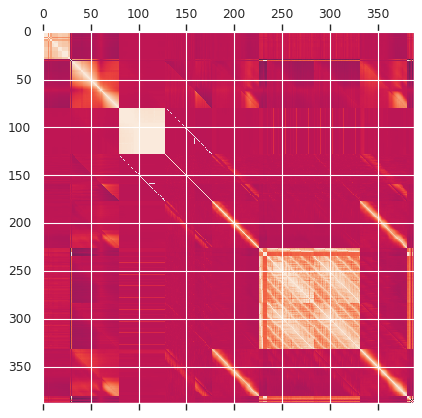

In [ ]:
plt.matshow(df_credit.corr())

In [ ]:
#heat_map = sns.heatmap(df_credit)

In [ ]:
df_dropna = df_credit_imputation.dropna()

# 4. Visualizacion de los datos

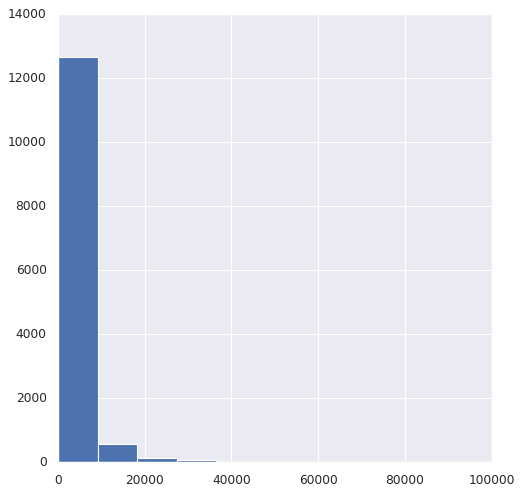

In [ ]:
## grafica de las variables par ve freceuncias
plt.rcParams["figure.figsize"] = [7.,7.]
df_credit['INGRESO_201710'].hist()
#df_credit[].drop([],1).hist()
plt.show()

In [ ]:
fig_bar_chart = px.bar(df_dropna,x = 'SEGMENTO',y ='EDAD_AFIL', title='Grupo de segmento por edad del Afiliado',
                       color ='SEXO',height=700,
                       orientation = "v",
                       template="plotly_white",
                       color_discrete_map={
                      "M": "blue",
                      "F": "red",
                      },
                      color_discrete_sequence=px.colors.qualitative.G10,
                       #opacity=1.0,
                      barmode ='group')
fig.update_traces(opacity=1.0)
fig_bar_chart.show()

In [ ]:
fig_bar_age_pago = px.bar(df_dropna,x = 'TIPO_PAGO',y ='EDAD_AFIL',
                       title='Tipo de pago por categoria de segmento',
                       color ='SEGMENTO',height=700)
#fig_bar_age_pago.update_traces(opacity=1.0)
fig_bar_age_pago.show()

In [ ]:
#@title Texto de título predeterminado
fig_bar_sex_smoke = px.bar(df_dropna,x = "SEXO",y = "EDAD_AFIL",color = "FLG_FUMADOR",
                           barmode="group",
                           title = '',
                           orientation = 'v')
fig_bar_sex_smoke.show()

# 4. Preparar y limpiar los datos (Data preparation)


## Data Transformation

### Remove Columns

In [ ]:
# verificacion de nulos (cantidad)
df_credit.isnull().sum()

ID                   0
INGRESO_201710    6910
INGRESO_201711    6910
INGRESO_201712    6910
INGRESO_201801    6910
                  ... 
vp_primas            0
vp_siniestros        0
vp_tecnico           0
vp_gastos            0
VP_OPERATIVO         0
Length: 400, dtype: int64

### Transform columns in upper case

## Data Reduction


### Feature Selection





### PCA

## Data Cleaning

## Missing Values

### Copia del Dataframe inicial

In [ ]:
df_credit_imputation = df_credit.copy()
df_credit_imputation.head(2)

,ID,INGRESO_201710,INGRESO_201711,INGRESO_201712,INGRESO_201801,INGRESO_201802,INGRESO_201803,INGRESO_201804,INGRESO_201805,INGRESO_201806,INGRESO_201807,INGRESO_201808,INGRESO_201809,INGRESO_201810,INGRESO_201811,INGRESO_201812,INGRESO_201901,INGRESO_201902,INGRESO_201903,INGRESO_201904,INGRESO_201905,INGRESO_201906,INGRESO_201907,INGRESO_201908,INGRESO_201909,INGRESO_201910,INGRESO_201911,INGRESO_201912,INGRESO_202001,CODMES_ALTA,EDAD,Attrition_Sistema_201601,Attrition_Sistema_201602,Attrition_Sistema_201603,Attrition_Sistema_201604,Attrition_Sistema_201605,Attrition_Sistema_201606,Attrition_Sistema_201607,Attrition_Sistema_201608,Attrition_Sistema_201609,...,DIAS_MORA_201804,DIAS_MORA_201805,DIAS_MORA_201806,DIAS_MORA_201807,DIAS_MORA_201808,DIAS_MORA_201809,DIAS_MORA_201810,DIAS_MORA_201811,DIAS_MORA_201812,DIAS_MORA_201901,DIAS_MORA_201902,DIAS_MORA_201903,DIAS_MORA_201904,DIAS_MORA_201905,DIAS_MORA_201906,DIAS_MORA_201907,DIAS_MORA_201908,DIAS_MORA_201909,DIAS_MORA_201910,DIAS_MORA_201911,DIAS_MORA_201912,DIAS_MORA_202001,SEGMENTO,FREC_PAGO,EDAD_AFIL_MESES,SEXO,CATEGORIA,EDAD_AFIL,FLG_FUMADOR,RANGO_INGRESO_APOR,DEPARTAMENTO,PROVINCIA,DISTRITO,MACRO_REGION,TIPO_PAGO,vp_primas,vp_siniestros,vp_tecnico,vp_gastos,VP_OPERATIVO
0,1,849.0,849.0,849.0,849.0,849.0,849.0,849.0,849.0,849.0,1097.0,1097.0,1097.0,1097.0,1097.0,1097.0,1097.0,1097.0,1097.0,1097.0,1097.0,545.0,545.0,545.0,545.0,545.0,545.0,548.0,548.0,201801.0,53.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,...,NaN,7.0,0.0,7.0,0.0,0.0,7.0,37.0,68.0,99.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,05.LIMITADO,01.MENSUAL,635,M,TITULAR,52,FUMA,02.[600 - 1000>,UCAYALI,CORONEL,CALLERIA,SELVA,DEBITO,2754.6892,1660.5546,1066.2301,521.4950,544.73511
1,2,857.0,857.0,857.0,857.0,857.0,857.0,857.0,857.0,857.0,857.0,857.0,857.0,857.0,857.0,857.0,857.0,857.0,857.0,857.0,857.0,857.0,857.0,857.0,857.0,857.0,857.0,857.0,857.0,200509.0,80.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,08.NBC_SI,02.ANUAL,784,M,TITULAR,65,NO FUMA,02.[600 - 1000>,UCAYALI,CORONEL,CALLERIA,SELVA,EFECTIVO,20851.5960,13848.7160,6791.6572,2850.5735,3941.08400


### Imputacion de variable Ingresos

#### Remove NaN

#### Look for missing values

In [ ]:
# verificacion de valores nulos por columna
df_credit_imputation.isnull().sum()

ID                   0
INGRESO_201710    6910
INGRESO_201711    6910
INGRESO_201712    6910
INGRESO_201801    6910
                  ... 
vp_primas            0
vp_siniestros        0
vp_tecnico           0
vp_gastos            0
VP_OPERATIVO         0
Length: 400, dtype: int64

#### Data imputation

In [ ]:
# seleccionar columna de imputacion
df_credit_imputation[['INGRESO_201710']]

,INGRESO_201710
0,849.00
1,857.00
2,4319.05
3,4000.00
4,4000.00
...,...
20297,NaN
20298,NaN
20299,NaN
20300,NaN


In [ ]:
imp_ingreso_mean = SimpleImputer(missing_values=np.nan,strategy='mean')
imp_ingreso_mean.fit(df_credit_imputation[['INGRESO_201710']])
df_credit_imputation["INGRESO_201710"] = imp_ingreso_mean.transform(df_credit_imputation[['INGRESO_201710']])

In [ ]:
# verificacion de valores nulos por columna
df_credit_imputation[["INGRESO_201710"]].isnull().sum()

### Francy Atrittion

In [ ]:
## grafica de las variables par ve freceuncias
plt.rcParams["figure.figsize"] = [5.,5.]
df_credit_imputation['Attrition_Sistema_202001'].hist()
#df_credit[].drop([],1).hist()
plt.show()

In [ ]:
## grafica de las variables par ver freceuncias
plt.rcParams["figure.figsize"] = [5.,5.]
df_credit_imputation['ATTRITION_MOROSIDAD_202001'].hist()
#df_credit[].drop([],1).hist()
plt.show()

In [ ]:
df_credit_imputation['Attrition_Sistema_202001'].describe()

In [ ]:
df_credit_imputation['ATTRITION_MOROSIDAD_202001'].describe()

In [ ]:
df_credit_imputation.groupby('ATTRITION_MOROSIDAD_202001').count()

In [ ]:
#analizando frecuencia
df_credit_imputation.groupby('ATTRITION_MOROSIDAD_202001')['ATTRITION_MOROSIDAD_202001'].count()

#### Look for missing values

In [ ]:
print('Números de Registros:', len(df_credit_imputation['Attrition_Sistema_202001']))
print('Número de Nulos:', df_credit_imputation['Attrition_Sistema_202001'].isnull().sum())
print('Proporción de Nulos:',round(df_credit_imputation['Attrition_Sistema_202001'].isnull().sum() * 100 
                                   / len(df_credit_imputation['Attrition_Sistema_202001']),2) , "%")

#### Data imputation

In [ ]:
# imputacion
imp_at = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imp_at.fit(df_credit_imputation[['Attrition_Sistema_202001']])
df_credit_imputation["Attrition_Sistema_202001"]=imp_at.transform(df_credit_imputation[['Attrition_Sistema_202001']])

In [ ]:
# % nulos luego de imputacion
df_credit_imputation["Attrition_Sistema_202001"].isnull().sum()/len(df_credit_imputation['Attrition_Sistema_202001'])

### Jonathan Pagos

#### Look for missing values

In [ ]:
# % de nulos
df_credit_imputation["PAGO_201610"].isnull().sum()/len(df_credit_imputation)

#### Data imputation

In [ ]:
# imputacion
imp = SimpleImputer(missing_values=np.nan,strategy="mean")
imp.fit(df_credit_imputation[["PAGO_201610"]])
df_credit_imputation["PAGO_201610"] = imp.transform(df_credit_imputation[["PAGO_201610"]])

In [ ]:
# % nulos luego de imputacion
df_credit_imputation["PAGO_201610"].isnull().sum()/len(df_credit_imputation)

In [ ]:
plt.boxplot(df_credit_imputation["PAGO_201610"],vert=False)
plt.show()

### Diego Dias_Mora

#### Look for missing values

In [ ]:
# cantidad de valores totales
len(df_credit_imputation)

# cantidad de valores nulos por columna
df_credit_imputation[["DIAS_MORA_201603​"]].isnull().sum()

In [ ]:
% de valores nulos
df_credit_imputation[["DIAS_MORA_201603​"]].isnull().sum()/len(df_credit_imputation)

In [ ]:
# verificar columna a imputar
df_credit_imputation[['INGRESO_201710']]

#### Data imputation

### Rodolfo (Tipo_pago)

#### Look for missing values

In [ ]:
print('Números de registros', len(df_credit_imputation['TIPO_PAGO']))

In [ ]:
# analizar nulos
print('número de nulos', df_credit_imputation['TIPO_PAGO'].isnull().sum())
print(df_credit_imputation['TIPO_PAGO'].isnull().sum() * 100 / len(df_credit_imputation['TIPO_PAGO']) , "%")

In [ ]:
# analizar no nulos
df_credit_imputation['TIPO_PAGO'].describe(include = 'all')

In [ ]:
#analizando frecuencia
df_credit_imputation.groupby('TIPO_PAGO')['TIPO_PAGO'].count()

In [ ]:
df_credit_imputation.groupby('TIPO_PAGO').size().plot(kind='pie', autopct='%.2f')

#### Data imputation

In [ ]:
#Imputando con la moda
imp = SimpleImputer(missing_values= np.nan, strategy='most_frequent')
imp.fit(df_credit_imputation[['TIPO_PAGO']])
df_credit_imputation['TIPO_PAGO'] = imp.transform(df_credit_imputation[['TIPO_PAGO']])

In [ ]:
# analizar nulos
print('número de nulos', df_credit_imputation['TIPO_PAGO'].isnull().sum())

In [ ]:
#analizando frecuencia
df_credit_imputation.groupby('TIPO_PAGO')['TIPO_PAGO'].count()

In [ ]:
df_credit_imputation.groupby('TIPO_PAGO').size().plot(kind='pie', autopct='%.2f')

### Outliers

In [ ]:
sns.boxplot(x ='CATEGORIA',y = 'EDAD_AFIL',hue='SEXO',data = df_credit)
sns.despine(offset=10,trim=True)

In [ ]:
# analsis de valores atipicos de la edad del afiliado
fig_box_age_afil = px.box(df_dropna,x = 'SEXO',y = 'EDAD_AFIL',points = 'all',color = 'FLG_FUMADOR',title = 'Grafico de boxplot de sexo vs la edad del afiliado')
fig_box_age_afil.show()

### Duplicate Data

#### Drop duplicate

# 4. Modelado.  

 # 5. Evaluacion de Modelo.

# 6. Despliegue.

In [ ]:
df_credit[["vp_primas","vp_siniestros","vp_tecnico","vp_gastos","VP_OPERATIVO","INGRESO_201711","EDAD_AFIL","DEPARTAMENTO","P"]]

In [ ]:
df_dropna[["INGRESO_201711","ATTRITION_MOROSIDAD_201710","EDAD_AFIL","PRIMA_2017","TIPO_PAGO","TAMAÑO_GF_201711","SEGMENTO"]]

,INGRESO_201711,ATTRITION_MOROSIDAD_201710,EDAD_AFIL,PRIMA_2017,TIPO_PAGO,TAMAÑO_GF_201711,SEGMENTO
90,2069.00,0.0,46,105.0,CREDITO,2.0,04.REGULAR
212,2408.00,0.0,68,170.0,CREDITO,1.0,01.ELITE
243,2737.33,0.0,57,130.0,CREDITO,3.0,03.POTENCIAL
247,990.00,0.0,45,52.0,CREDITO,1.0,03.POTENCIAL
348,2200.00,0.0,40,35.0,DEBITO,4.0,03.POTENCIAL
...,...,...,...,...,...,...,...
15984,1500.00,0.0,20,12.0,DEBITO,4.0,01.ELITE
16021,0.00,0.0,6,12.0,CREDITO,3.0,04.REGULAR
16585,0.00,0.0,19,27.0,CREDITO,2.0,01.ELITE
17791,0.00,0.0,18,22.0,DEBITO,2.0,05.LIMITADO
